In [14]:
from biopandas.pdb import PandasPdb
from math import *
import numpy as np
pdb1=PandasPdb().read_pdb('/home/ailon/Desktop/python_practice/1t46_STI_A.txt')
pdb1.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,262,,CA,,LEU,,A,595,,...,31.938,29.660,49.840,1.0,21.57,,,C,NaN,1
1,ATOM,263,,C,,LEU,,A,595,,...,32.154,30.564,48.630,1.0,21.57,,,C,NaN,2
2,ATOM,264,,O,,LEU,,A,595,,...,33.048,30.326,47.816,1.0,21.57,,,O,NaN,3
3,ATOM,265,,CB,,LEU,,A,595,,...,31.255,28.355,49.426,1.0,21.57,,,C,NaN,4
4,ATOM,266,,CG,,LEU,,A,595,,...,31.074,27.310,50.531,1.0,21.57,,,C,NaN,5


In [2]:
pdb2=pdb1.df['ATOM']

In [3]:
pdb2['atom_name']=='CA'
# Atom name이 ‘CA’인지 질문해 결과를 T/F인 시리즈로 출력한다.

0       True
1      False
2      False
3      False
4      False
       ...  
498    False
499    False
500    False
501    False
502    False
Name: atom_name, Length: 503, dtype: bool

In [4]:
pdb2.loc[pdb2['atom_name']=='CA',:]
#불리언 인덱싱으로 atom_name이 ‘CA’인 행만 추출한다.

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,262,,CA,,LEU,,A,595,,...,31.938,29.660,49.840,1.0,21.57,,,C,NaN,1
8,ATOM,270,,CA,,GLY,,A,596,,...,31.424,32.568,47.447,1.0,21.44,,,C,NaN,9
12,ATOM,274,,CA,,ALA,,A,597,,...,29.702,35.947,47.302,1.0,23.14,,,C,NaN,13
17,ATOM,299,,CA,,GLY,,A,601,,...,23.924,36.450,46.017,1.0,28.91,,,C,NaN,18
21,ATOM,303,,CA,,LYS,,A,602,,...,26.165,34.154,48.009,1.0,22.52,,,C,NaN,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,ATOM,1384,,CA,,GLY,,A,812,,...,26.416,33.292,38.708,1.0,21.25,,,C,NaN,465
468,ATOM,1388,,CA,,LEU,,A,813,,...,24.982,35.770,41.238,1.0,21.38,,,C,NaN,469
476,ATOM,1396,,CA,,ALA,,A,814,,...,27.459,34.429,43.805,1.0,19.38,,,C,NaN,477
481,ATOM,1401,,CA,,ARG,,A,815,,...,30.703,35.641,42.235,1.0,24.55,,,C,NaN,482


In [7]:
pdb3=pdb2.loc[pdb2['atom_name']=='CA',:]

In [8]:
pdb3.loc[:,['residue_name','residue_number','x_coord','y_coord','z_coord']]
pdb4=pdb3.loc[:,['residue_name','residue_number','x_coord','y_coord','z_coord']]

In [10]:
def euclidean_distance(x, y):
    return sqrt(sum(pow(a - b, 2) for a, b in zip(x, y)))

In [12]:
for i in range(len(pdb4)):
    for j in range(i+1,len(pdb4)):
        residue_pair1_1=pdb4.iloc[i][['residue_name','residue_number']].values
        residue_pair2_1=pdb4.iloc[j][['residue_name','residue_number']].values
        residue_pair1_2=pdb4.iloc[i][['x_coord','y_coord','z_coord']].values
        residue_pair2_2=pdb4.iloc[j][['x_coord','y_coord','z_coord']].values
        print(residue_pair1_1,residue_pair2_1,euclidean_distance(residue_pair1_2,residue_pair2_2),i,j)
        

['LEU' 595] ['GLY' 596] 3.8009352796384195 0 1
['LEU' 595] ['ALA' 597] 7.139153241106401 0 2
['LEU' 595] ['GLY' 601] 11.17781843652866 0 3
['LEU' 595] ['LYS' 602] 7.541626217202762 0 4
['LEU' 595] ['VAL' 603] 5.317814400672518 0 5
['LEU' 595] ['VAL' 604] 5.102479691287362 0 6
['LEU' 595] ['VAL' 620] 11.192119861759881 0 7
['LEU' 595] ['ALA' 621] 8.23504426217613 0 8
['LEU' 595] ['VAL' 622] 9.190084656846205 0 9
['LEU' 595] ['LYS' 623] 9.439753651446631 0 10
['LEU' 595] ['MET' 624] 11.520001171874942 0 11
['LEU' 595] ['ALA' 636] 19.450930080589977 0 12
['LEU' 595] ['LEU' 637] 16.85429657387101 0 13
['LEU' 595] ['MET' 638] 19.873861476824278 0 14
['LEU' 595] ['SER' 639] 21.07234047276192 0 15
['LEU' 595] ['GLU' 640] 17.906809766119704 0 16
['LEU' 595] ['LEU' 641] 18.260040032814825 0 17
['LEU' 595] ['LYS' 642] 21.930720849985757 0 18
['LEU' 595] ['VAL' 643] 21.3890274206192 0 19
['LEU' 595] ['LEU' 644] 19.182404385269333 0 20
['LEU' 595] ['SER' 645] 21.916656816220854 0 21
['LEU' 595] ['

['GLY' 601] ['PHE' 811] 9.184849808244012 3 61
['GLY' 601] ['GLY' 812] 8.342931678972331 3 62
['GLY' 601] ['LEU' 813] 4.941720854115501 3 63
['GLY' 601] ['ALA' 814] 4.633962667091743 3 64
['GLY' 601] ['ARG' 815] 7.804668218444653 3 65
['GLY' 601] ['TYR' 823] 17.199749009796623 3 66
['LYS' 602] ['VAL' 603] 3.785704425863173 4 5
['LYS' 602] ['VAL' 604] 6.511896881861692 4 6
['LYS' 602] ['VAL' 620] 13.793148770313476 4 7
['LYS' 602] ['ALA' 621] 10.232060300838736 4 8
['LYS' 602] ['VAL' 622] 8.157515185398065 4 9
['LYS' 602] ['LYS' 623] 5.662768315938772 4 10
['LYS' 602] ['MET' 624] 5.614251597497215 4 11
['LYS' 602] ['ALA' 636] 13.363210504964739 4 12
['LYS' 602] ['LEU' 637] 11.043686567446581 4 13
['LYS' 602] ['MET' 638] 14.402867075690175 4 14
['LYS' 602] ['SER' 639] 16.048880739789922 4 15
['LYS' 602] ['GLU' 640] 13.805465946501043 4 16
['LYS' 602] ['LEU' 641] 14.52662032270411 4 17
['LYS' 602] ['LYS' 642] 18.183387500683146 4 18
['LYS' 602] ['VAL' 643] 18.35495197487588 4 19
['LYS' 60

['ALA' 621] ['LEU' 644] 14.029704986206944 8 20
['ALA' 621] ['SER' 645] 15.769787189432835 8 21
['ALA' 621] ['LEU' 647] 17.93800328910662 8 22
['ALA' 621] ['GLY' 648] 16.87817898945262 8 23
['ALA' 621] ['ASN' 649] 14.97675004799105 8 24
['ALA' 621] ['HIS' 650] 16.369248150113677 8 25
['ALA' 621] ['ASN' 652] 16.126852234704703 8 26
['ALA' 621] ['ILE' 653] 13.77093264815423 8 27
['ALA' 621] ['VAL' 654] 10.021067308425787 8 28
['ALA' 621] ['ASN' 655] 10.097694538853904 8 29
['ALA' 621] ['LEU' 656] 9.617691874873094 8 30
['ALA' 621] ['LEU' 657] 9.409943995582545 8 31
['ALA' 621] ['GLY' 658] 10.423449524989316 8 32
['ALA' 621] ['LEU' 667] 9.971862463953261 8 33
['ALA' 621] ['VAL' 668] 8.220264533456332 8 34
['ALA' 621] ['ILE' 669] 5.768765725872389 8 35
['ALA' 621] ['THR' 670] 5.241567036679014 8 36
['ALA' 621] ['GLU' 671] 5.775969009612154 8 37
['ALA' 621] ['TYR' 672] 4.856510681549048 8 38
['ALA' 621] ['CYS' 673] 8.049476815296757 8 39
['ALA' 621] ['GLY' 676] 10.587774506476796 8 40
['ALA

['ALA' 636] ['LEU' 783] 18.789830148247752 12 44
['ALA' 636] ['ILE' 789] 15.761777215783763 12 45
['ALA' 636] ['HIS' 790] 14.717607991789976 12 46
['ALA' 636] ['ASP' 792] 15.725676265267579 12 47
['ALA' 636] ['LEU' 793] 18.461300658404326 12 48
['ALA' 636] ['ALA' 794] 20.722336692564383 12 49
['ALA' 636] ['ALA' 795] 22.66598857319045 12 50
['ALA' 636] ['ARG' 796] 20.29837478715969 12 51
['ALA' 636] ['ASN' 797] 17.644059736919964 12 52
['ALA' 636] ['ILE' 798] 20.281653680111987 12 53
['ALA' 636] ['LEU' 799] 21.350318170931317 12 54
['ALA' 636] ['LEU' 800] 24.841202748659335 12 55
['ALA' 636] ['THR' 806] 24.600069349495747 12 56
['ALA' 636] ['LYS' 807] 21.02337463396398 12 57
['ALA' 636] ['ILE' 808] 18.480831934737143 12 58
['ALA' 636] ['CYS' 809] 15.28100287939244 12 59
['ALA' 636] ['ASP' 810] 12.482616192128958 12 60
['ALA' 636] ['PHE' 811] 12.167172555692636 12 61
['ALA' 636] ['GLY' 812] 9.201083251443823 12 62
['ALA' 636] ['LEU' 813] 8.381580101627616 12 63
['ALA' 636] ['ALA' 814] 11

['LEU' 641] ['VAL' 654] 11.576909518520043 17 28
['LEU' 641] ['ASN' 655] 10.768797379466289 17 29
['LEU' 641] ['LEU' 656] 7.892686931584199 17 30
['LEU' 641] ['LEU' 657] 10.150514568237414 17 31
['LEU' 641] ['GLY' 658] 8.93602182181758 17 32
['LEU' 641] ['LEU' 667] 9.178195628771485 17 33
['LEU' 641] ['VAL' 668] 6.590992869060013 17 34
['LEU' 641] ['ILE' 669] 9.014417895793382 17 35
['LEU' 641] ['THR' 670] 9.948947733303253 17 36
['LEU' 641] ['GLU' 671] 13.465745207748437 17 37
['LEU' 641] ['TYR' 672] 15.955656614505088 17 38
['LEU' 641] ['CYS' 673] 17.994830063104235 17 39
['LEU' 641] ['GLY' 676] 20.563838868265815 17 40
['LEU' 641] ['ASP' 677] 20.137084744321854 17 41
['LEU' 641] ['LEU' 678] 22.306470227268143 17 42
['LEU' 641] ['MET' 780] 18.181317581517575 17 43
['LEU' 641] ['LEU' 783] 15.098706898274438 17 44
['LEU' 641] ['ILE' 789] 15.46205827178258 17 45
['LEU' 641] ['HIS' 790] 14.501718863638205 17 46
['LEU' 641] ['ASP' 792] 17.21102300852567 17 47
['LEU' 641] ['LEU' 793] 18.39

['LEU' 647] ['HIS' 790] 12.127326828283307 22 46
['LEU' 647] ['ASP' 792] 16.980173467900734 22 47
['LEU' 647] ['LEU' 793] 16.481182512186436 22 48
['LEU' 647] ['ALA' 794] 19.370374002584462 22 49
['LEU' 647] ['ALA' 795] 20.486153445681303 22 50
['LEU' 647] ['ARG' 796] 20.49586655889426 22 51
['LEU' 647] ['ASN' 797] 16.71097283224409 22 52
['LEU' 647] ['ILE' 798] 16.366965418183053 22 53
['LEU' 647] ['LEU' 799] 17.076481458426965 22 54
['LEU' 647] ['LEU' 800] 18.996344937908447 22 55
['LEU' 647] ['THR' 806] 16.307988257292806 22 56
['LEU' 647] ['LYS' 807] 13.106804492323821 22 57
['LEU' 647] ['ILE' 808] 11.814899661021249 22 58
['LEU' 647] ['CYS' 809] 12.01817032663458 22 59
['LEU' 647] ['ASP' 810] 13.325140524587347 22 60
['LEU' 647] ['PHE' 811] 16.389399409374338 22 61
['LEU' 647] ['GLY' 812] 16.648620243131262 22 62
['LEU' 647] ['LEU' 813] 19.18801334166724 22 63
['LEU' 647] ['ALA' 814] 20.123650041679817 22 64
['LEU' 647] ['ARG' 815] 21.830170017661334 22 65
['LEU' 647] ['TYR' 823] 

['VAL' 654] ['ARG' 796] 13.565151602543928 28 51
['VAL' 654] ['ASN' 797] 10.365773343074798 28 52
['VAL' 654] ['ILE' 798] 8.923758905304425 28 53
['VAL' 654] ['LEU' 799] 7.94954960988357 28 54
['VAL' 654] ['LEU' 800] 9.741964534938525 28 55
['VAL' 654] ['THR' 806] 8.675702911003814 28 56
['VAL' 654] ['LYS' 807] 5.078932171234422 28 57
['VAL' 654] ['ILE' 808] 5.843331070545296 28 58
['VAL' 654] ['CYS' 809] 5.700452789033517 28 59
['VAL' 654] ['ASP' 810] 8.961089331102555 28 60
['VAL' 654] ['PHE' 811] 11.006212836393816 28 61
['VAL' 654] ['GLY' 812] 13.47457368527851 28 62
['VAL' 654] ['LEU' 813] 15.947308863880457 28 63
['VAL' 654] ['ALA' 814] 14.921189597347796 28 64
['VAL' 654] ['ARG' 815] 16.34646099313243 28 65
['VAL' 654] ['TYR' 823] 22.853612777851996 28 66
['ASN' 655] ['LEU' 656] 3.793165696354431 29 30
['ASN' 655] ['LEU' 657] 6.309110951631776 29 31
['ASN' 655] ['GLY' 658] 9.467753429404464 29 32
['ASN' 655] ['LEU' 667] 14.529985891252613 29 33
['ASN' 655] ['VAL' 668] 10.8052216

['THR' 670] ['HIS' 790] 17.819733639984634 36 46
['THR' 670] ['ASP' 792] 19.202456613673156 36 47
['THR' 670] ['LEU' 793] 18.928286081946244 36 48
['THR' 670] ['ALA' 794] 19.716792994805214 36 49
['THR' 670] ['ALA' 795] 18.938630784721475 36 50
['THR' 670] ['ARG' 796] 17.230408613843146 36 51
['THR' 670] ['ASN' 797] 14.54681387795967 36 52
['THR' 670] ['ILE' 798] 13.9685682158194 36 53
['THR' 670] ['LEU' 799] 11.974342069608666 36 54
['THR' 670] ['LEU' 800] 13.519779066242167 36 55
['THR' 670] ['THR' 806] 14.28838430334235 36 56
['THR' 670] ['LYS' 807] 11.209184582296785 36 57
['THR' 670] ['ILE' 808] 12.146823823535106 36 58
['THR' 670] ['CYS' 809] 10.284180521558339 36 59
['THR' 670] ['ASP' 810] 12.020849429220881 36 60
['THR' 670] ['PHE' 811] 12.220987439646601 36 61
['THR' 670] ['GLY' 812] 14.407588382515653 36 62
['THR' 670] ['LEU' 813] 15.308953295375883 36 63
['THR' 670] ['ALA' 814] 13.9700986395945 36 64
['THR' 670] ['ARG' 815] 16.64494217472683 36 65
['THR' 670] ['TYR' 823] 25.

['HIS' 790] ['ALA' 794] 9.822046680809454 46 49
['HIS' 790] ['ALA' 795] 12.73138904440517 46 50
['HIS' 790] ['ARG' 796] 12.935073173353137 46 51
['HIS' 790] ['ASN' 797] 9.873604458352585 46 52
['HIS' 790] ['ILE' 798] 11.604228582719317 46 53
['HIS' 790] ['LEU' 799] 14.669652313534906 46 54
['HIS' 790] ['LEU' 800] 17.79463663579563 46 55
['HIS' 790] ['THR' 806] 15.526850453327617 46 56
['HIS' 790] ['LYS' 807] 13.04802099936998 46 57
['HIS' 790] ['ILE' 808] 9.311939325403705 46 58
['HIS' 790] ['CYS' 809] 9.018044688290251 46 59
['HIS' 790] ['ASP' 810] 7.850358335770413 46 60
['HIS' 790] ['PHE' 811] 11.189205557143012 46 61
['HIS' 790] ['GLY' 812] 10.588553253395858 46 62
['HIS' 790] ['LEU' 813] 14.237805729816658 46 63
['HIS' 790] ['ALA' 814] 15.541479048018566 46 64
['HIS' 790] ['ARG' 815] 15.158448832251933 46 65
['HIS' 790] ['TYR' 823] 15.86125471077241 46 66
['ASP' 792] ['LEU' 793] 3.7617051984439187 47 48
['ASP' 792] ['ALA' 794] 6.162149462646945 47 49
['ASP' 792] ['ALA' 795] 9.5780

In [ ]:
for i in range(len(pdb4)):
    for j in range(i+1,len(pdb4)):
        residue_pair1_1=pdb4.iloc[i][['residue_name','residue_number']].values
        residue_pair2_1=pdb4.iloc[j][['residue_name','residue_number']].values
        residue_pair1_2=pdb4.iloc[i][['x_coord','y_coord','z_coord']].values
        residue_pair2_2=pdb4.iloc[j][['x_coord','y_coord','z_coord']].values
        print(residue_pair1_1,residue_pair2_1,euclidean_distance(residue_pair1_2,residue_pair2_2),i,j)

In [25]:
for i in range(len(pdb4)):
    for j in range(len(pdb4)):
        residue_pair1_2=pdb4.iloc[i][['x_coord','y_coord','z_coord']].values
        residue_pair2_2=pdb4.iloc[j][['x_coord','y_coord','z_coord']].values
        arr1[i][j]=euclidean_distance(residue_pair1_2,residue_pair2_2)

In [24]:
arr1=np.empty((len(pdb4), len(pdb4)))

In [26]:
arr1

array([[ 0.        ,  3.80093528,  7.13915324, ...,  8.90090035,
         9.75364604, 18.8618748 ],
       [ 3.80093528,  0.        ,  3.79525361, ...,  5.69637692,
         6.09328434, 15.57407635],
       [ 7.13915324,  3.79525361,  0.        , ...,  4.42316425,
         5.1739855 , 14.8743496 ],
       ...,
       [ 8.90090035,  5.69637692,  4.42316425, ...,  0.        ,
         3.80228615, 13.87526396],
       [ 9.75364604,  6.09328434,  5.1739855 , ...,  3.80228615,
         0.        , 10.37587346],
       [18.8618748 , 15.57407635, 14.8743496 , ..., 13.87526396,
        10.37587346,  0.        ]])

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt

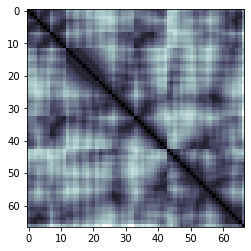

In [29]:
plt.imshow(arr1,cmap='bone')

In [31]:
arr2=np.empty((len(pdb4), len(pdb4)))

In [32]:
for i in range(len(pdb4)):
    for j in range(len(pdb4)):
        if arr1[i][j]<=8:
            arr2[i][j]=1
        else:
            arr2[i][j]=0
            
    

In [33]:
arr2

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

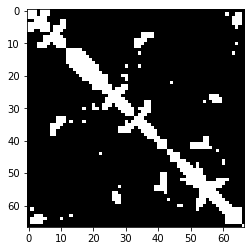

In [34]:
plt.imshow(arr2,cmap='bone')